In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict


import seaborn as sns # plotting library
from sklearn import svm
import xgboost as xg 

# Investigate the files in the directory
- Print all file names
- This was done to make sure, Surgery, Histology, Diagnostics and Treatment are all excluded as advised
- Have a glance at all the data useful for our analysis

In [2]:
# Import the data

import pandas as pd
xls = pd.ExcelFile('/Users/habeeb/Downloads/PanCystGan/panc_cys_gan_Clean.xlsx',engine='openpyxl')

#print the names of each sheets in the excel file
xls.sheet_names

['Diagnosis_info',
 'Demogra',
 'symptoms',
 'signs',
 'MedHist',
 'Meds',
 'Lifestyle',
 'FamLife',
 'FamHCanc',
 'Blood',
 'Urine']

In [3]:
#convert each and every excel sheet as dataframe and assign them same name as the worksheet's name
#sheet_names=sheet_names()

for name in xls.sheet_names:
    if name.isdigit():
        exec(f"Sheet_name{name}=pd.read_excel('/Users/habeeb/Downloads/PanCystGan/panc_cys_gan_Clean.xlsx', sheet_name='{name}',engine='openpyxl')")

    else:
        exec(f"{name}=pd.read_excel('/Users/habeeb/Downloads/PanCystGan/panc_cys_gan_Clean.xlsx', sheet_name='{name}',engine='openpyxl')")

In [4]:
# Print the head of the first sheet which is the DIagInfo
Diagnosis_info.head()

,visit_id,subject_id,visit_date,diagnosis,diagnosis_date,organ,type,subtype,Overall_verified,Diagnosis_Verified
0,B01P0011A,B01P0011,2015-02-13,Final,2015-06-23,Pancreas,Premalignant lesions,Intraductal papillary-mucinous adenoma,Yes,Yes
1,B01P0014A,B01P0014,2015-02-25,Final,2015-04-15,Pancreas,Malignant,Solid pseudopapillary carcinoma,Yes,Yes
2,B01P0014B,B01P0014,2015-03-20,Final,2015-04-15,Pancreas,Malignant,Solid pseudopapillary carcinoma,Yes,Yes
3,B01P0014C,B01P0014,2018-03-07,Final,2015-04-15,Pancreas,Malignant,Solid pseudopapillary carcinoma,Yes,Yes
4,B01P0045A,B01P0045,2015-05-06,Provisional,2015-05-20,Pancreas,Premalignant lesions,"Mucinous cystadenoma, NOS",Yes,Yes


In [5]:
#Drop all columns in DiagInfo except the Type and the visit ID
DiagInfo=Diagnosis_info[['visit_id','type','diagnosis']]

In [6]:
Blood.head()

,visit_id,patient_id,ALT,AST,Alb,Alp,Bil,CA 19-9,CEA,CRP,Creat,Hb,INR,K,Na,Plt,T Prot,Urea,WCC,eGFR
0,B01P0011A,B01P0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,14.40,1.0,4.50,138.0,214.0,NaN,4.70,6.40,89.0
1,B01P0045A,B01P0045,16.0,NaN,45.0,79.5,3.0,3.400000,NaN,8.0,83.5,8.25,1.0,4.35,141.0,310.5,NaN,6.05,5.15,66.5
2,B01P0065A,B01P0065,118.0,NaN,31.0,488.0,21.0,4739.333333,NaN,6.0,105.0,10.40,1.0,4.00,144.0,264.0,NaN,8.10,6.20,48.0
3,B01P0071A,B01P0071,17.0,NaN,46.0,105.0,17.0,0.600000,NaN,5.0,59.0,12.80,1.0,5.00,137.0,334.0,NaN,5.10,7.20,93.0
4,B01P0091A,B01P0091,40.0,NaN,40.0,57.0,18.5,10.000000,NaN,23.5,100.0,14.65,1.1,4.60,144.5,310.0,NaN,6.65,12.65,65.0


In [55]:
# compile the list of dataframes you want to merge
from functools import reduce
#From the meeting held on 8/08/2022. Hemant recommend we dont include the following tab i. Diag info ii. Surgery iii.Demography iv. Therapy and v. Histology.

data_frames = [DiagInfo,Demogra,symptoms,signs,MedHist,Lifestyle,FamLife,FamHCanc,Blood,Urine]

Inner = reduce(lambda  left,right: pd.merge(left,right,on=('visit_id'),how='inner'), data_frames)
Merged = reduce(lambda  left,right: pd.merge(left,right,on=('visit_id'),how='outer'), data_frames)

In [56]:
Merged.head()

,visit_id,type,diagnosis,subject_id_x,visit_date,age,gender,height_cm,weight_kg,race,...,diptest_done,diptest_date,leu,nit,pro,ph,blo,sg,ket,glu
0,B01P0011A,Premalignant lesions,Final,B01P0011,2015-02-13 00:00:00,72,Male,177.80,98.43,Caucasian: Western European,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,B01P0014A,Malignant,Final,B01P0014,2015-02-25 00:00:00,28,Female,161.29,57.00,Asian: Far East,...,Yes,2015-02-25 00:00:00,Negative,Negative,Negative,6.5,Haemo (trace),1.015,Negative,Negative
2,B01P0014B,Malignant,Final,B01P0014,2015-03-20 00:00:00,28,Female,161.29,57.00,Asian: Far East,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,B01P0014C,Malignant,Final,B01P0014,2018-03-07 00:00:00,28,Female,161.29,57.00,Asian: Far East,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,B01P0045A,Premalignant lesions,Provisional,B01P0045,2015-05-06 00:00:00,50,Female,162.56,79.38,Caucasian: Western European,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [57]:
#check duplicates in the dataset
# occurrence based on all columns
duplicate = Merged[Merged.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,visit_id,type,diagnosis,subject_id_x,visit_date,age,gender,height_cm,weight_kg,race,...,diptest_done,diptest_date,leu,nit,pro,ph,blo,sg,ket,glu
376,C03P0044A,Premalignant lesions,Final,C03P0044,2018-04-20 00:00:00,49,Female,169.0,88.9,Unknown,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
377,C03P0044A,Premalignant lesions,Final,C03P0044,2018-04-20 00:00:00,49,Female,169.0,88.9,Unknown,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
378,C03P0044A,Premalignant lesions,Final,C03P0044,2018-04-20 00:00:00,49,Female,169.0,88.9,Unknown,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [58]:
#remove duplicates in the data frame
Merged=Merged.drop_duplicates()

In [59]:
# iterating the columns
for col in Merged.columns:
    print(col)

visit_id
type
diagnosis
subject_id_x
visit_date
age
gender
height_cm
weight_kg
race
bmi
Number_days_to_visit
subject_id_y
pain_duration
jaundice_duration
weightLoss_duration
weightLoss_amount
nausea_duration
vomit_duration
diarrhoea_duration
constipation_duration
other_duration_x
PainSiteAbdomenAndBack
PainSiteAbdomenLLQ
PainSiteAbdomenLUQ
PainSiteAbdomenNOS
PainSiteAbdomenCentral
PainSiteAbdomenEpigastric
PainSiteAbdomenLeft
PainSiteAbdomenRight
PainSiteBack
PainSiteChest
PainSiteEpigastricAndBack
PainSiteLowerAbdomenNOS
PainSitePelvic
PainSitePostOp
PainSiteShoulder
PainSiteNA
PainSiteUnknown
JaundiceNo
JaundiceYes
JaundiceUnknown
ConstipationNo
ConstipationYes
ConstipationUnknown
DiarrhoeaNo
DiarrhoeaYes
DiarrhoeaUnknown
NauseaNo
NauseaYes
NauseaUnknown
OtherNo
OtherYes
OtherUnknown
VomitNo
VomitYes
VomitUnknown
WeightLossNo
WeightLossYes
WeightLossUnknown
subject_id_x
medical_test_jaundice
medical_test_abdoMass
medical_test_lymphNode
subject_id_y
diabetes
diabetes_duration
asthma
a

In [60]:
Merged.to_csv("Ready_to_use.csv")

In [40]:
#we have some columns that are duplicates and they end _x or _y, lets remove them
Merged = Merged.drop([x for x in Merged.columns if x.endswith('_y')], 1)
Merged = Merged.drop([x for x in Merged.columns if x.endswith('_x')], 1)
Merged = Merged.drop([x for x in Merged.columns if x.endswith('_id')], 1)
Merged = Merged.drop([x for x in Merged.columns if x.endswith('_date')], 1)

In [41]:
# iterating the columns after deleting columns with duplicates and columns that repeats itself
for col in Merged.columns:
    print(col)

type
age
gender
height_cm
weight_kg
race
bmi
Number_days_to_visit
pain_duration
jaundice_duration
weightLoss_duration
weightLoss_amount
nausea_duration
vomit_duration
diarrhoea_duration
constipation_duration
PainSiteAbdomenAndBack
PainSiteAbdomenLLQ
PainSiteAbdomenLUQ
PainSiteAbdomenNOS
PainSiteAbdomenCentral
PainSiteAbdomenEpigastric
PainSiteAbdomenLeft
PainSiteAbdomenRight
PainSiteBack
PainSiteChest
PainSiteEpigastricAndBack
PainSiteLowerAbdomenNOS
PainSitePelvic
PainSitePostOp
PainSiteShoulder
PainSiteNA
PainSiteUnknown
JaundiceNo
JaundiceYes
JaundiceUnknown
ConstipationNo
ConstipationYes
ConstipationUnknown
DiarrhoeaNo
DiarrhoeaYes
DiarrhoeaUnknown
NauseaNo
NauseaYes
NauseaUnknown
OtherNo
OtherYes
OtherUnknown
VomitNo
VomitYes
VomitUnknown
WeightLossNo
WeightLossYes
WeightLossUnknown
medical_test_jaundice
medical_test_abdoMass
medical_test_lymphNode
diabetes
diabetes_duration
asthma
asthma_duration
cholesterol
cholesterol_duration
hypertension
hypertension_duration
heart
heart_dura

In [176]:
#explore the merged sheet.

#from dataprep.eda import create_report
#create_report(Merged)

In [177]:
#Recode Race and other features
Race=Merged[["RaceAfroCarribean","RaceAsianFarEast","RaceAsianSouth","RaceAsianSouthEast","RaceCaucasianEasternEuropean","RaceCaucasianWesternEuropean","RaceOther","RaceUnknown"]]

def reverse(row):
    for c in Race.columns:
        if row[c]==1:
            return c
        
Merged['Race']=Race.apply(reverse, axis=1).str.replace("Race","")

In [178]:
Merged.drop(Race, axis=1,inplace=True)

In [179]:
Merged.head()

,type,age,gender,height_cm,weight_kg,bmi,Number_days_to_visit,pain_duration,jaundice_duration,weightLoss_duration,...,ket80,ketNegative,ketNA,glu>=2000,glu100,glu1000,glu250,gluNegative,gluNA,Race
0,Premalignant lesions,72,1,177.80,98.43,31.136083,26512.0,0,0,0,...,0,0,1,0,0,0,0,0,1,CaucasianWesternEuropean
1,Malignant,28,0,161.29,57.00,21.910888,10348.0,> 26 weeks,0,0,...,0,1,0,0,0,0,0,1,0,AsianFarEast
2,Malignant,28,0,161.29,57.00,21.910888,10371.0,0,0,0,...,0,0,1,0,0,0,0,0,1,AsianFarEast
3,Malignant,28,0,161.29,57.00,21.910888,11454.0,0,0,0,...,0,0,1,0,0,0,0,0,1,AsianFarEast
4,Premalignant lesions,50,0,162.56,79.38,30.038878,18590.0,0,0,0,...,0,0,1,0,0,0,0,0,1,CaucasianWesternEuropean


In [180]:
# iterating the columns after deleting columns with duplicates and columns that repeats itself
for col in Merged.columns:
    print(col)

type
age
gender
height_cm
weight_kg
bmi
Number_days_to_visit
pain_duration
jaundice_duration
weightLoss_duration
weightLoss_amount
nausea_duration
vomit_duration
diarrhoea_duration
constipation_duration
other_duration
PainSiteAbdomenAndBack
PainSiteAbdomenLLQ
PainSiteAbdomenLUQ
PainSiteAbdomenNOS
PainSiteAbdomenCentral
PainSiteAbdomenEpigastric
PainSiteAbdomenLeft
PainSiteAbdomenRight
PainSiteBack
PainSiteChest
PainSiteEpigastricAndBack
PainSiteLowerAbdomenNOS
PainSitePelvic
PainSitePostOp
PainSiteShoulder
PainSiteNA
PainSiteUnknown
JaundiceNo
JaundiceYes
JaundiceUnknown
ConstipationNo
ConstipationYes
ConstipationUnknown
DiarrhoeaNo
DiarrhoeaYes
DiarrhoeaUnknown
NauseaNo
NauseaYes
NauseaUnknown
OtherNo
OtherYes
OtherUnknown
VomitNo
VomitYes
VomitUnknown
WeightLossNo
WeightLossYes
WeightLossUnknown
MedTestJaundiceNo
MedTestJaundiceYes
MedTestJaundiceUnknown
MedTestAbdoMassNo
MedTestAbdoMassYes
MedTestAbdoMassUnknown
MedTestLymphNodeNo
MedTestLymphNodeYes
MedTestLymphNodeUnknown
SmokingN

In [181]:
#Recode Race and other features
PainSite=Merged[["PainSiteAbdomenAndBack","PainSiteAbdomenLLQ","PainSiteAbdomenLUQ","PainSiteAbdomenNOS","PainSiteAbdomenCentral","PainSiteAbdomenEpigastric","PainSiteAbdomenLeft","PainSiteAbdomenRight","PainSiteBack","PainSiteChest","PainSiteEpigastricAndBack","PainSiteLowerAbdomenNOS","PainSitePelvic","PainSitePostOp","PainSiteShoulder","PainSiteNA","PainSiteUnknown"]]

def reverse(row):
    for c in PainSite.columns:
        if row[c]==1:
            return c
        
Merged['PainSite']=PainSite.apply(reverse, axis=1).str.replace("PainSite","")

In [182]:
Merged.drop(PainSite, axis=1,inplace=True)

### Simple Data Explorations

In [183]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))


In [184]:
initial_eda(Merged)

Dimensions : 399 rows, 207 columns
Total NA Values : 23297 
                           Column Name  Data Type      #Distinct  NA Values
                                  type     object            3          1
                                   age      int64           58          0
                                gender      int64            2          0
                             height_cm    float64           68         91
                             weight_kg    float64          130         88
                                   bmi    float64          180         92
                  Number_days_to_visit    float64          324          2
                         pain_duration     object           19          5
                     jaundice_duration     object           10          5
                   weightLoss_duration     object           16          5
                     weightLoss_amount    float64           20          7
                       nausea_duration     object 

In [206]:
#Descriptive statistics 

Features_to_inspect=Merged[['age','height_cm','weight_kg','bmi','Number_days_to_visit','weightLoss_amount','no_of_child','diag_age','ALP','ALT','AST','Alb','Bil','CA 19-9','CEA','CRP','Creat','Hb','INR','K','Na','Plt','T Prot','Urea','WCC','eGFR']]
Features_to_inspect.describe().to_csv("descriptive.csv")

<AxesSubplot:>

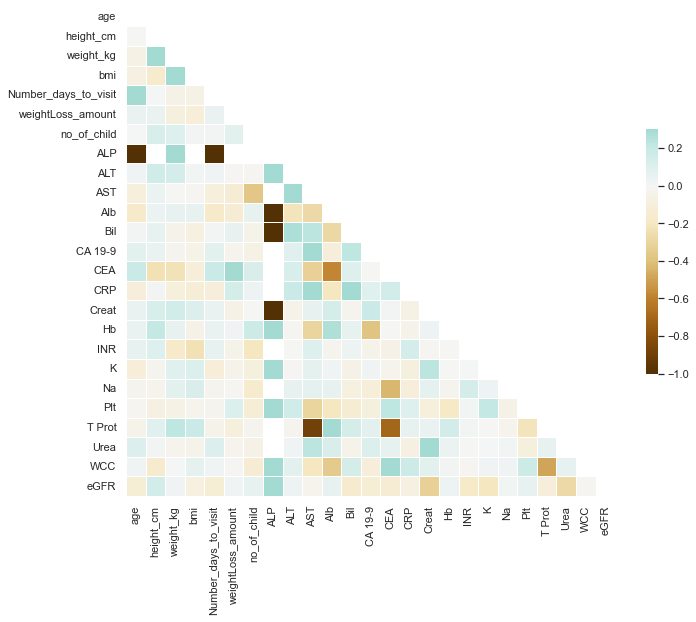

In [186]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = Features_to_inspect.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='BrBG', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

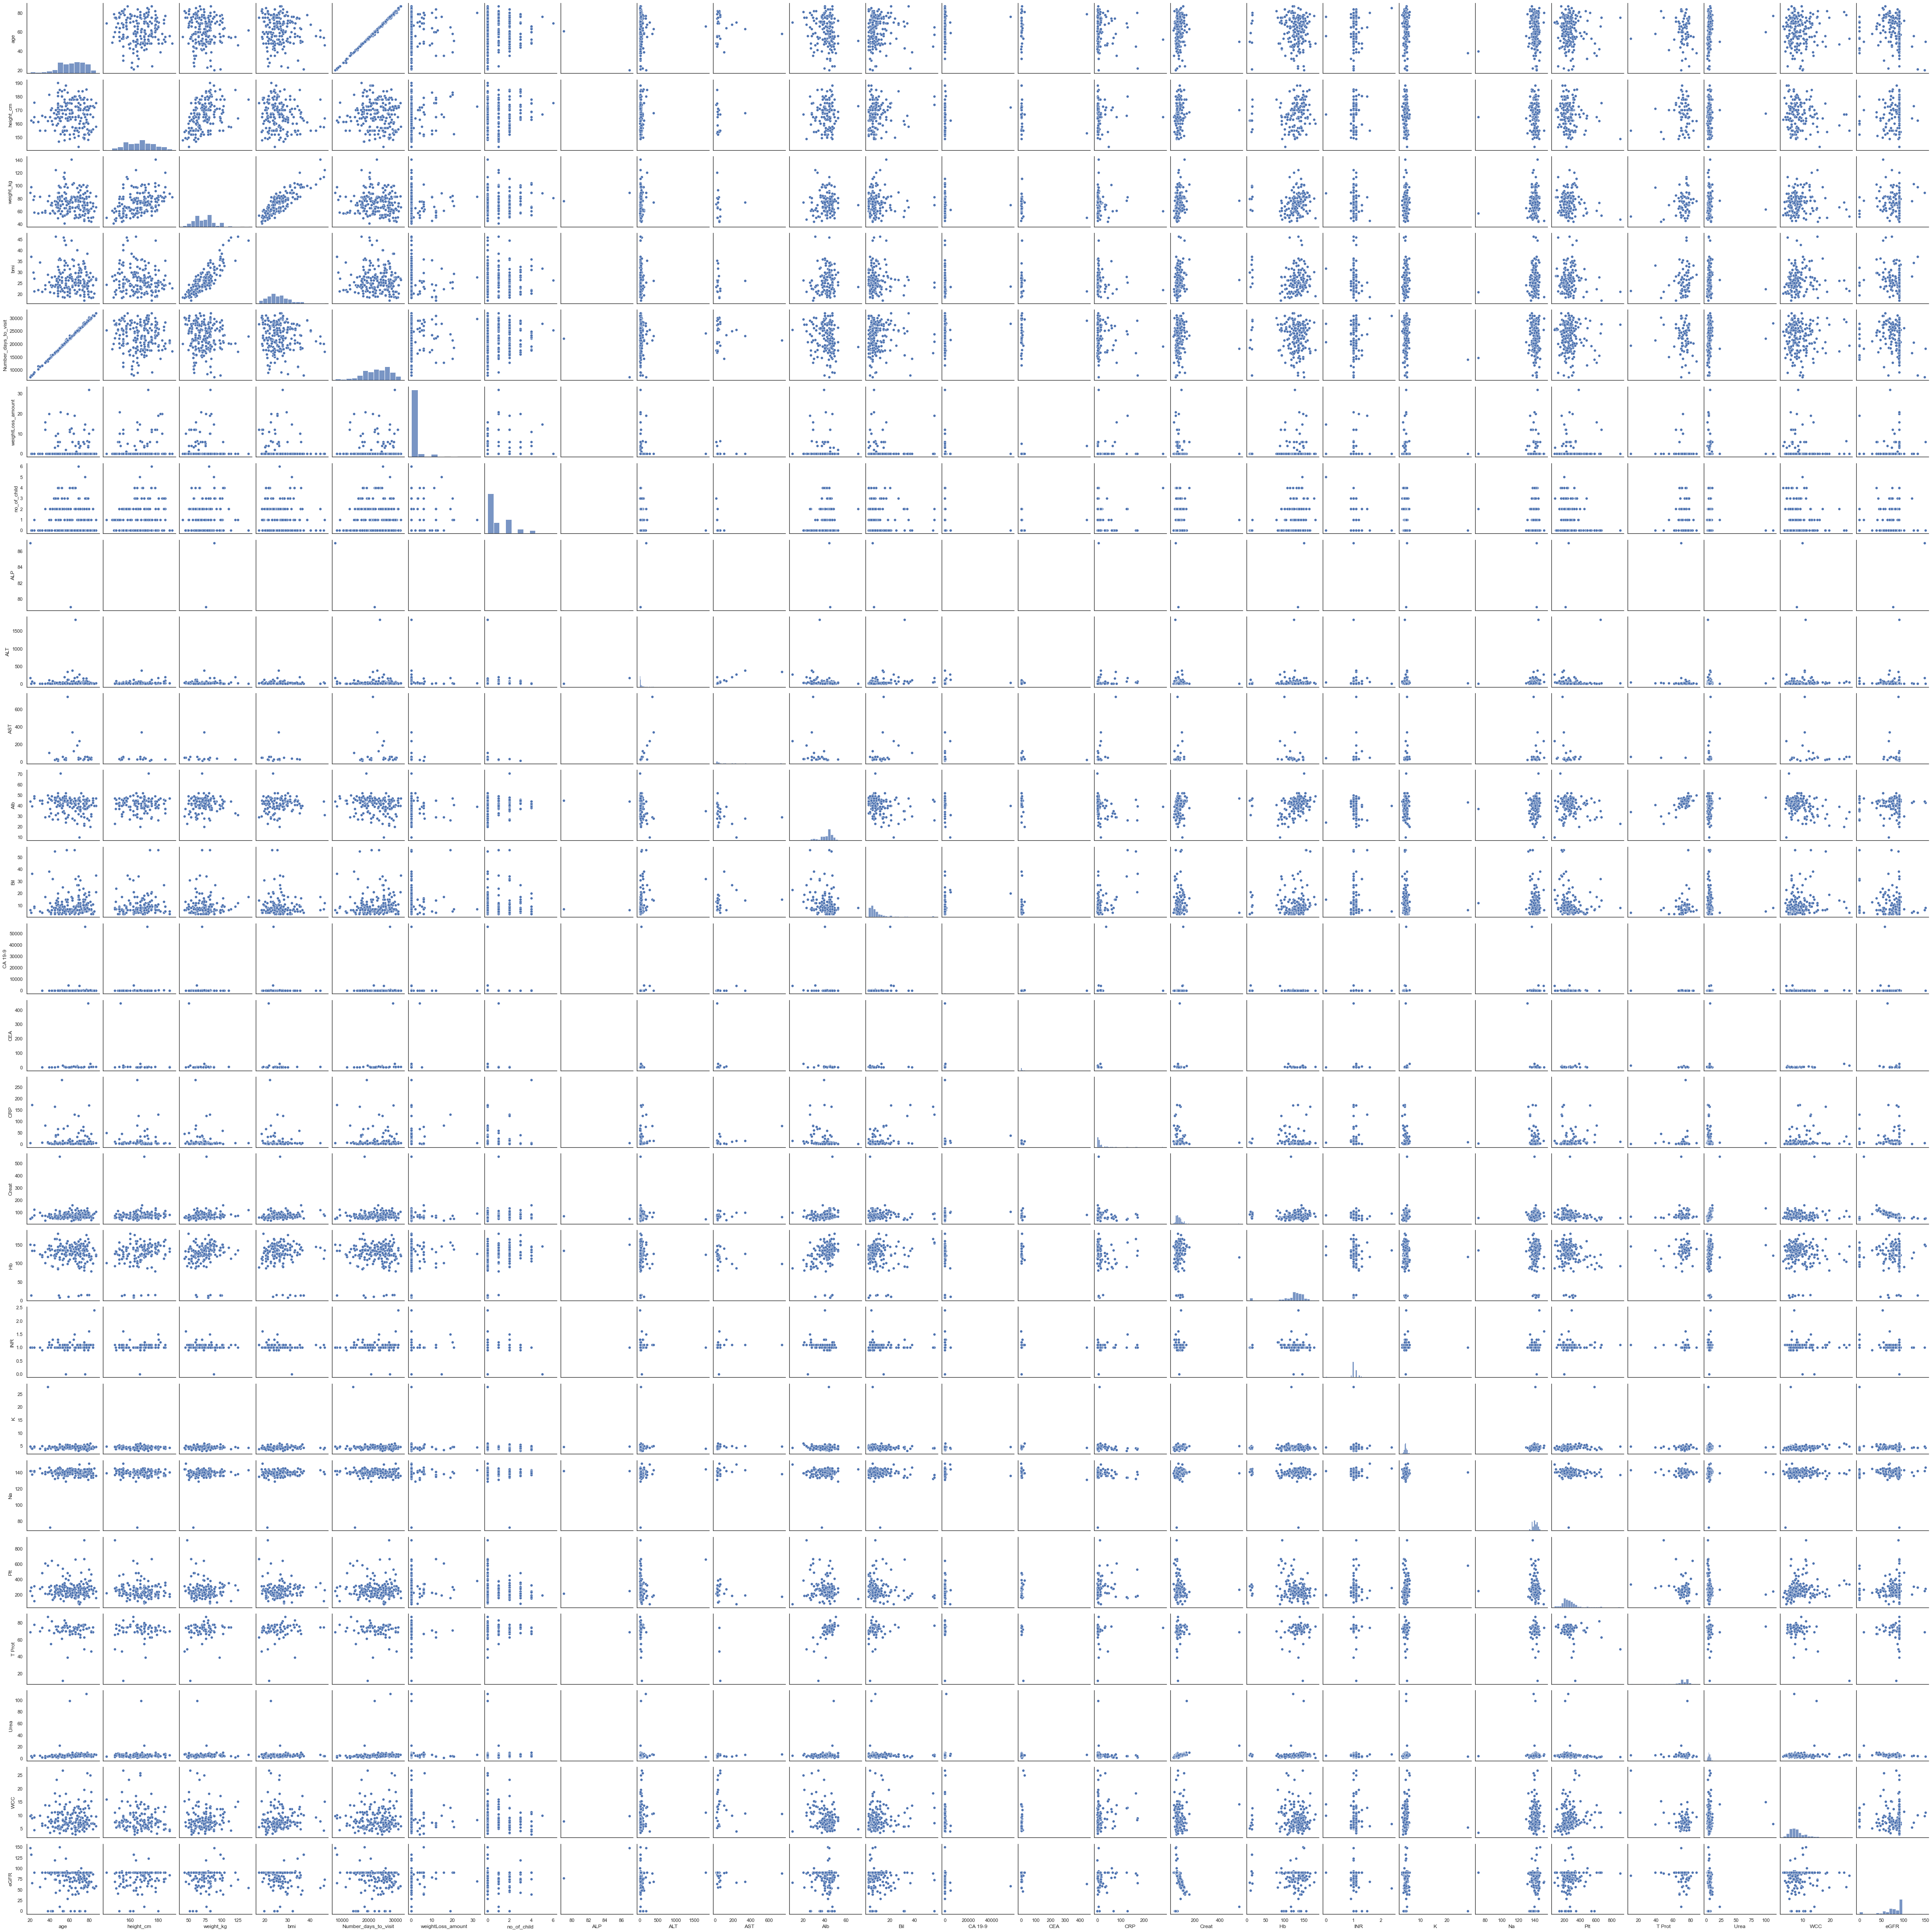

In [122]:
# Basic correlogram
sns.pairplot(Features_to_inspect)
plt.show()

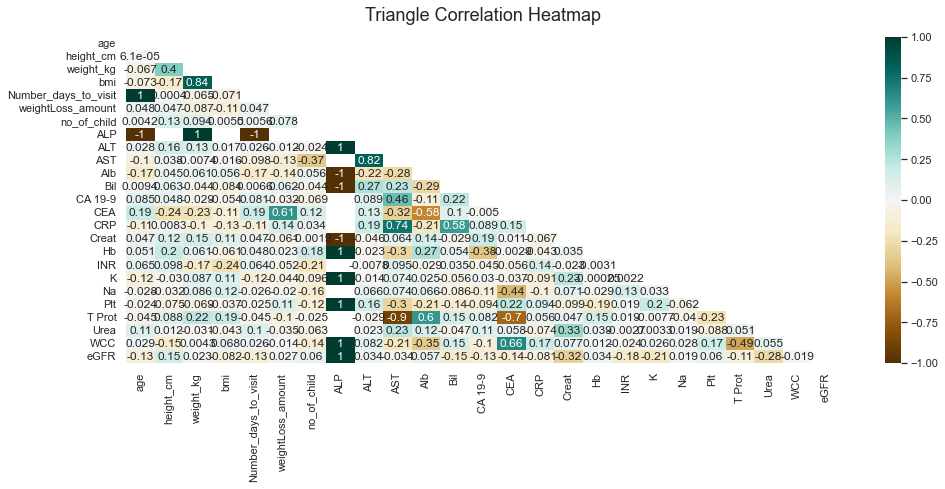

In [187]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(Features_to_inspect.corr(), dtype=np.bool))
heatmap = sns.heatmap(Features_to_inspect.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

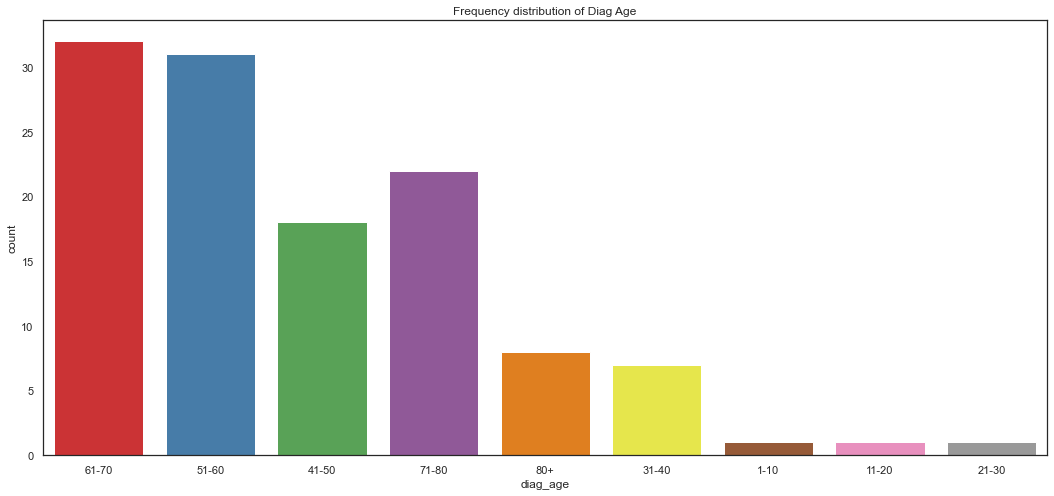

In [188]:
# visualize frequency distribution 
f,ax=plt.subplots(figsize=(18,8))

#f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="diag_age", data=Merged, palette="Set1")
ax.set_title("Frequency distribution of Diag Age")

plt.show()

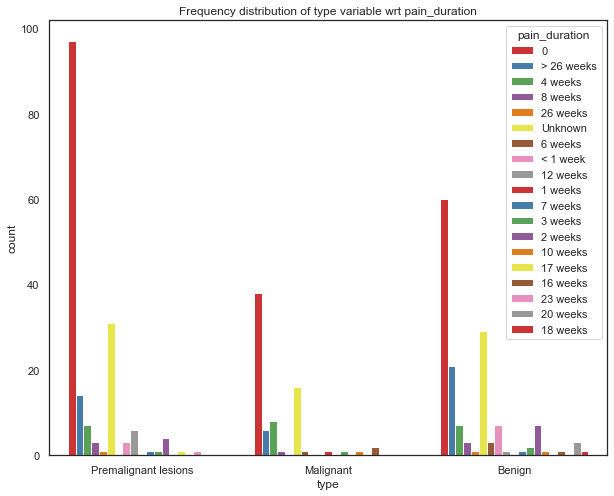

In [189]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="pain_duration", data=Merged, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt pain_duration")
plt.show()

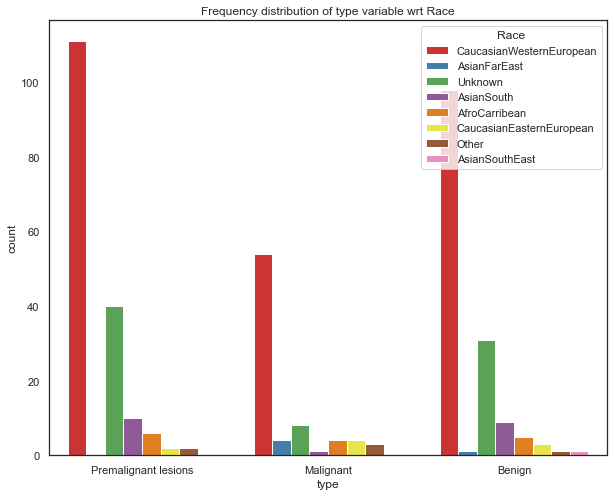

In [190]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="Race", data=Merged, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt Race")
plt.show()

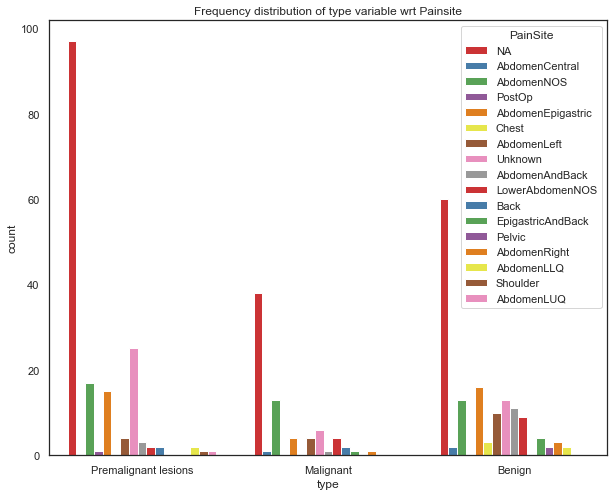

In [191]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="PainSite", data=Merged, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt Painsite")
plt.show()

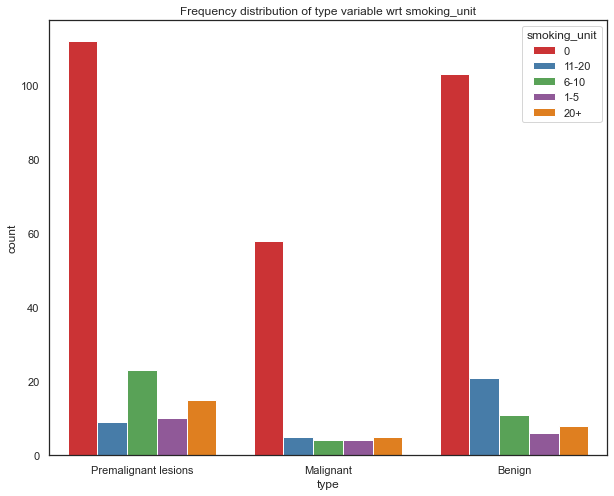

In [192]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="smoking_unit", data=Merged, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt smoking_unit")
plt.show()

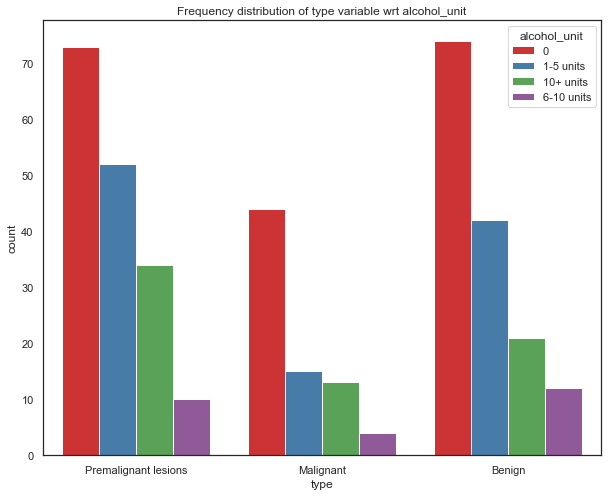

In [193]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="alcohol_unit", data=Merged, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt alcohol_unit")
plt.show()

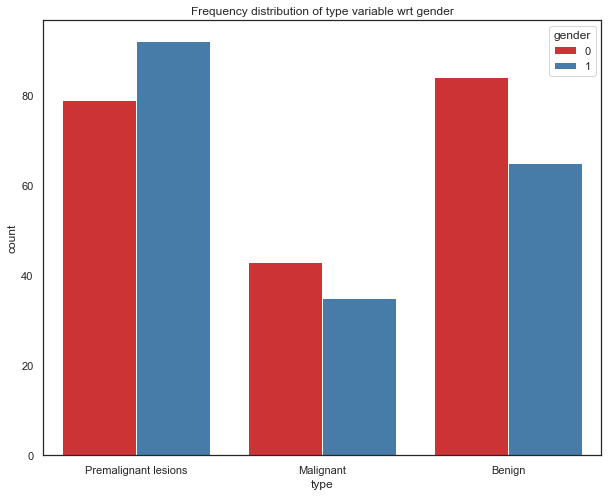

In [207]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="type", hue="gender", data=Merged, palette="Set1")
ax.set_title("Frequency distribution of type variable wrt gender")
plt.show()

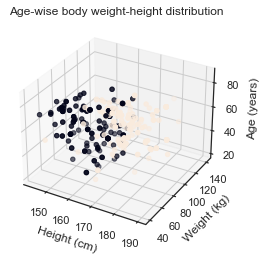

In [194]:
np.random.seed(42)

ages = Merged['age']

heights = Merged['height_cm']

weights = Merged['weight_kg']

gender = Merged['gender'] #0 for male, 1 for female

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = heights, ys = weights, zs = ages, c=gender)

ax.set_title("Age-wise body weight-height distribution")

ax.set_xlabel("Height (cm)")

ax.set_ylabel("Weight (kg)")

ax.set_zlabel("Age (years)")

plt.show()

In [210]:
Try=Merged.groupby(['type']).describe()

In [211]:
Try.head()

age                                                \
                      count       mean        std   min   25%   50%   75%   
type                                                                        
Benign                149.0  59.812081  13.699166  22.0  50.0  60.0  69.0   
Malignant              78.0  58.461538  17.131040  20.0  48.5  63.0  72.5   
Premalignant lesions  171.0  65.321637  11.510433  30.0  56.0  67.0  75.0   

                           gender            ... gluNegative       gluNA  \
                       max  count      mean  ...         75%  max  count   
type                                         ...                           
Benign                87.0  149.0  0.436242  ...         0.0  1.0  149.0   
Malignant             87.0   78.0  0.448718  ...         0.0  1.0   78.0   
Premalignant lesions  87.0  171.0  0.538012  ...         0.0  1.0  171.0   

                                                                   
                          mean       std  min  25%  50%  75%  max  
type                                                               
Benign                0.758389  0.429503  0.0  1.0  1.0  1.0  1.0  
Malignant             0.794872  0.406409  0.0  1.0  1.0  1.0  1.0  
Premalignant lesions  0.736842  0.441641  0.0  0.0  1.0  1.0  1.0  

[3 rows x 1520 columns]

In [118]:
#Imputations, use mean for the numeric features and mode for categorical features
#v=Merged.select_dtypes(exclude=['object']).columns
#t=~Merged.columns.isin(v)
#Merged.loc[:,v]=Merged.loc[:,v].fillna(Merged.loc[:,v].mean().to_dict())

#Merged.loc[:,t]=Merged.loc[:,t].fillna(Merged.loc[:,t].mode().iloc[0].to_dict())

In [197]:
def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

import numpy as np
bad_indexes = []
for col in Features_to_inspect.columns:
    if Merged[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_outliers(Merged[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

159


In [198]:
#inspect the data after inputation
initial_eda(Merged)

Dimensions : 399 rows, 207 columns
Total NA Values : 23297 
                           Column Name  Data Type      #Distinct  NA Values
                                  type     object            3          1
                                   age      int64           58          0
                                gender      int64            2          0
                             height_cm    float64           68         91
                             weight_kg    float64          130         88
                                   bmi    float64          180         92
                  Number_days_to_visit    float64          324          2
                         pain_duration     object           19          5
                     jaundice_duration     object           10          5
                   weightLoss_duration     object           16          5
                     weightLoss_amount    float64           20          7
                       nausea_duration     object 

In [204]:
Merged['type'].unique()

array(['Premalignant lesions', 'Malignant', 'Benign', nan], dtype=object)

In [205]:
#lets work on fragment of the data
categorical = [col for col in Merged.columns if Merged[col].dtypes == 'O']

categorical

['type',
 'pain_duration',
 'jaundice_duration',
 'weightLoss_duration',
 'nausea_duration',
 'vomit_duration',
 'diarrhoea_duration',
 'constipation_duration',
 'other_duration',
 'smoking_duration',
 'smoking_unit',
 'alcohol_duration',
 'alcohol_unit',
 'drugs_duration',
 'diag_age',
 'Race',
 'PainSite']

In [201]:
Merged.pain_duration.head()

0             0
1    > 26 weeks
2             0
3             0
4             0
Name: pain_duration, dtype: object

In [202]:
df_cat=Merged[['type',
 'pain_duration',
 'jaundice_duration',
 'weightLoss_duration',
 'nausea_duration',
 'vomit_duration',
 'diarrhoea_duration',
 'constipation_duration',
 'other_duration',
 'smoking_duration',
 'smoking_unit',
 'alcohol_duration',
 'alcohol_unit',
 'drugs_duration',
 'diag_age',
 'Race',
 'PainSite']]

In [156]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(df):
    # load the dataset as a pandas DataFrame
    dataset = df.values
    # split into input (X) and output (y) variables
    X = df.drop(['type'], axis=1)
    y = df['type']
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset(df_cat)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

ValueError: Found unknown categories ['17 weeks'] in column 0 during transform

In [161]:
Merged.describe()

,age,gender,height_cm,weight_kg,bmi,Number_days_to_visit,weightLoss_amount,JaundiceNo,JaundiceYes,JaundiceUnknown,...,ket5,ket80,ketNegative,ketNA,glu>=2000,glu100,glu1000,glu250,gluNegative,gluNA
count,399.000000,399.000000,308.000000,311.000000,307.000000,397.000000,392.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,61.909774,0.481203,167.223117,73.526913,26.305321,22817.292191,1.044668,0.869674,0.070175,0.060150,...,0.002506,0.002506,0.238095,0.756892,0.002506,0.002506,0.002506,0.007519,0.228070,0.756892
std,13.861551,0.500274,9.962203,15.700043,5.416436,5098.455019,3.604756,0.337084,0.255763,0.238064,...,0.050063,0.050063,0.426452,0.429498,0.050063,0.050063,0.050063,0.086493,0.420115,0.429498
min,20.000000,0.000000,143.000000,40.600000,17.254813,7331.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,159.875000,60.350000,22.411639,19179.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,63.000000,0.000000,167.640000,72.900000,25.382415,23242.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,73.000000,1.000000,174.000000,82.550000,28.773627,26873.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,87.000000,1.000000,190.000000,141.000000,46.438132,31950.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Simple feature importance

In [203]:
#label encode the target 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Merged['type']=le.fit_transform(Merged["type"])

Merged.head()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [130]:
Merged['type'].unique()

array([2, 1, 0])

In [179]:
df=Merged
X = df.drop(['type'], axis=1)

y = df['type']

In [180]:
cat_df = [col for col in df.columns if df[col].dtypes == 'O']

cat_df

['pain_duration',
 'jaundice_duration',
 'weightLoss_duration',
 'nausea_duration',
 'vomit_duration',
 'diarrhoea_duration',
 'constipation_duration',
 'diabetes_duration',
 'asthma_duration',
 'cholesterol_duration',
 'hypertension_duration',
 'heart_duration',
 'kidney_duration',
 'lung_duration',
 'liver_duration',
 'stroke_duration',
 'other_duration.1',
 'medication_duration',
 'smoking_duration',
 'smoking_unit',
 'alcohol_duration',
 'alcohol_unit',
 'drugs_duration',
 'diag_age']

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [182]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2028, 581), (870, 581))

In [183]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['pain_duration',
 'jaundice_duration',
 'weightLoss_duration',
 'nausea_duration',
 'vomit_duration',
 'diarrhoea_duration',
 'constipation_duration',
 'diabetes_duration',
 'asthma_duration',
 'cholesterol_duration',
 'hypertension_duration',
 'heart_duration',
 'kidney_duration',
 'lung_duration',
 'liver_duration',
 'stroke_duration',
 'other_duration.1',
 'medication_duration',
 'smoking_duration',
 'smoking_unit',
 'alcohol_duration',
 'alcohol_unit',
 'drugs_duration',
 'diag_age']

In [184]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'bmi',
 'Number_days_to_visit',
 'RaceAfroCarribean',
 'RaceAsianFarEast',
 'RaceAsianSouth',
 'RaceAsianSouthEast',
 'RaceCaucasianEasternEuropean',
 'RaceCaucasianWesternEuropean',
 'RaceOther',
 'RaceUnknown',
 'weightLoss_amount',
 'PainSiteAbdomenAndBack',
 'PainSiteAbdomenLLQ',
 'PainSiteAbdomenLUQ',
 'PainSiteAbdomenNOS',
 'PainSiteAbdomenCentral',
 'PainSiteAbdomenEpigastric',
 'PainSiteAbdomenLeft',
 'PainSiteAbdomenRight',
 'PainSiteBack',
 'PainSiteChest',
 'PainSiteEpigastricAndBack',
 'PainSiteLowerAbdomenNOS',
 'PainSitePelvic',
 'PainSitePostOp',
 'PainSiteShoulder',
 'PainSiteNA',
 'PainSiteUnknown',
 'JaundiceNo',
 'JaundiceYes',
 'JaundiceUnknown',
 'ConstipationNo',
 'ConstipationYes',
 'ConstipationUnknown',
 'DiarrhoeaNo',
 'DiarrhoeaYes',
 'DiarrhoeaUnknown',
 'NauseaNo',
 'NauseaYes',
 'NauseaUnknown',
 'VomitNo',
 'VomitYes',
 'VomitUnknown',
 'WeightLossNo',
 'WeightLossYes',
 'WeightLossUnknown',
 'MedTestJaundic

In [185]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

pain_duration            0
jaundice_duration        0
weightLoss_duration      0
nausea_duration          0
vomit_duration           0
diarrhoea_duration       0
constipation_duration    0
diabetes_duration        0
asthma_duration          0
cholesterol_duration     0
hypertension_duration    0
heart_duration           0
kidney_duration          0
lung_duration            0
liver_duration           0
stroke_duration          0
other_duration.1         0
medication_duration      0
smoking_duration         0
smoking_unit             0
alcohol_duration         0
alcohol_unit             0
drugs_duration           0
diag_age                 0
dtype: int64

In [186]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

pain_duration            0
jaundice_duration        0
weightLoss_duration      0
nausea_duration          0
vomit_duration           0
diarrhoea_duration       0
constipation_duration    0
diabetes_duration        0
asthma_duration          0
cholesterol_duration     0
hypertension_duration    0
heart_duration           0
kidney_duration          0
lung_duration            0
liver_duration           0
stroke_duration          0
other_duration.1         0
medication_duration      0
smoking_duration         0
smoking_unit             0
alcohol_duration         0
alcohol_unit             0
drugs_duration           0
diag_age                 0
dtype: int64

In [187]:
# preview categorical variables in X_train

X_train[categorical].head()

,pain_duration,jaundice_duration,weightLoss_duration,nausea_duration,vomit_duration,diarrhoea_duration,constipation_duration,diabetes_duration,asthma_duration,cholesterol_duration,...,liver_duration,stroke_duration,other_duration.1,medication_duration,smoking_duration,smoking_unit,alcohol_duration,alcohol_unit,drugs_duration,diag_age
700,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,0,0,0,< 1 year,10+ units,0,51-60
1726,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,0,> 30 years,6-10,24 years,1-5 units,0,71-80
2646,2 weeks,0,0,2 weeks,2 weeks,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51-60
970,0,0,0,0,0,0,0,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,0,0,0,0,1-5 units,0,51-60
3636,18 weeks,0,0,0,0,0,0,16 years,24 years,Unknown,...,0,0,Unknown,0,0,0,0,0,0,51-60


In [188]:
# check missing values in X_test

X_test.isnull().sum()

age                  0
gender               0
height_cm            0
weight_kg            0
bmi                  0
                    ..
RadiologyM0          0
RadiologyM1          0
RadiologyMx          0
RadiologyMUnknown    0
RadiologyMNA         0
Length: 581, dtype: int64

In [189]:
# import category encoders

import category_encoders as ce
# encode categorical variables with frequency encoding

encoder = ce.CountEncoder(cols=cat_df)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [190]:
X_train.head()

,age,gender,height_cm,weight_kg,bmi,Number_days_to_visit,RaceAfroCarribean,RaceAsianFarEast,RaceAsianSouth,RaceAsianSouthEast,...,RadiologyTNA,RadiologyN0,RadiologyNx,RadiologyNUnknown,RadiologyNNA,RadiologyM0,RadiologyM1,RadiologyMx,RadiologyMUnknown,RadiologyMNA
700,56,1,188.00000,88.00000,24.898144,20755.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1726,79,0,148.40000,57.80000,26.245813,29009.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2646,72,0,167.28668,77.07792,27.553649,26151.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
970,60,0,170.18000,59.80000,20.648293,22121.0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3636,55,0,155.00000,79.60000,33.132154,20284.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [191]:
cols = X_train.columns

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [193]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [194]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [195]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8414


In [196]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8414


In [197]:
#Find important features with Random Forest model 

#Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

#First, I will create the Random Forest model as follows:-
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [198]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

height_cm                   0.030312
weight_kg                   0.024071
bmi                         0.020448
Alb                         0.020324
Number_days_to_visit        0.018459
                              ...   
Glucagon                    0.000000
Glimepiride                 0.000000
Gabapentin                  0.000000
Fortisip compact protein    0.000000
Dulosteride                 0.000000
Length: 581, dtype: float64

In [223]:
#import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


def rf_importance(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0):
    
    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model

def rf_importance_entropy(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0,criterion='entropy'):
    
    model = RandomForestClassifier(criterion='entropy',n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model

def rf_importance_logloss(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0,criterion='log_loss'):
    
    model = RandomForestClassifier(criterion='log_loss',n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model


def gbt_importance(X_train,y_train,max_depth=10,top_n=15,n_estimators=50,random_state=0):
    
    model = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                       random_state=random_state)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree[0].feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:")   
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
#    feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])   
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model

Feature ranking:
1. feature no:2 feature name:('height_cm',) (0.035184)
2. feature no:3 feature name:('weight_kg',) (0.027828)
3. feature no:4 feature name:('bmi',) (0.023047)
4. feature no:444 feature name:('Alb',) (0.021554)
5. feature no:14 feature name:('pain_duration',) (0.020982)
6. feature no:5 feature name:('Number_days_to_visit',) (0.018946)
7. feature no:563 feature name:('RadSourceNA',) (0.018495)
8. feature no:0 feature name:('age',) (0.018044)
9. feature no:446 feature name:('Bil',) (0.016236)
10. feature no:469 feature name:('Urea',) (0.015627)
11. feature no:450 feature name:('Creat',) (0.015267)
12. feature no:388 feature name:('no_of_child',) (0.013394)
13. feature no:466 feature name:('Plt',) (0.012030)
14. feature no:441 feature name:('ALT',) (0.011849)
15. feature no:133 feature name:('HyperTensionTreatmentUnknown',) (0.011626)
16. feature no:60 feature name:('MedTestAbdoMassNo',) (0.011582)
17. feature no:445 feature name:('Alp1',) (0.011400)
18. feature no:470 fea

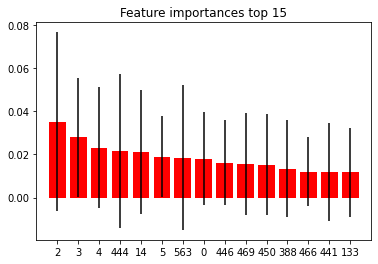

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, random_state=0)

In [200]:
rf_importance(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0)

Feature ranking:
1. feature no:2 feature name:('height_cm',) (0.027443)
2. feature no:5 feature name:('Number_days_to_visit',) (0.024935)
3. feature no:444 feature name:('Alb',) (0.023800)
4. feature no:3 feature name:('weight_kg',) (0.023014)
5. feature no:4 feature name:('bmi',) (0.021040)
6. feature no:14 feature name:('pain_duration',) (0.018471)
7. feature no:441 feature name:('ALT',) (0.017928)
8. feature no:445 feature name:('Alp1',) (0.017861)
9. feature no:388 feature name:('no_of_child',) (0.015833)
10. feature no:0 feature name:('age',) (0.015665)
11. feature no:466 feature name:('Plt',) (0.015551)
12. feature no:450 feature name:('Creat',) (0.015063)
13. feature no:452 feature name:('Hb',) (0.014827)
14. feature no:455 feature name:('Na',) (0.014717)
15. feature no:60 feature name:('MedTestAbdoMassNo',) (0.014522)
16. feature no:575 feature name:('RadiologyNNA',) (0.014366)
17. feature no:469 feature name:('Urea',) (0.013993)
18. feature no:453 feature name:('INR',) (0.0135

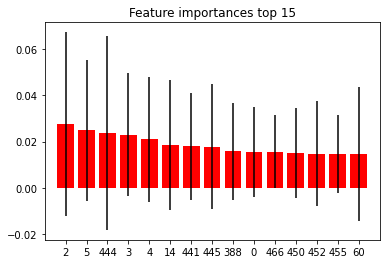

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       n_jobs=-1, random_state=0)

In [224]:
rf_importance_entropy(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0,criterion='entropy')

Feature ranking:
1. feature no:2 feature name:('height_cm',) (0.027443)
2. feature no:5 feature name:('Number_days_to_visit',) (0.024935)
3. feature no:444 feature name:('Alb',) (0.023800)
4. feature no:3 feature name:('weight_kg',) (0.023014)
5. feature no:4 feature name:('bmi',) (0.021040)
6. feature no:14 feature name:('pain_duration',) (0.018471)
7. feature no:441 feature name:('ALT',) (0.017928)
8. feature no:445 feature name:('Alp1',) (0.017861)
9. feature no:388 feature name:('no_of_child',) (0.015833)
10. feature no:0 feature name:('age',) (0.015665)
11. feature no:466 feature name:('Plt',) (0.015551)
12. feature no:450 feature name:('Creat',) (0.015063)
13. feature no:452 feature name:('Hb',) (0.014827)
14. feature no:455 feature name:('Na',) (0.014717)
15. feature no:60 feature name:('MedTestAbdoMassNo',) (0.014522)
16. feature no:575 feature name:('RadiologyNNA',) (0.014366)
17. feature no:469 feature name:('Urea',) (0.013993)
18. feature no:453 feature name:('INR',) (0.0135

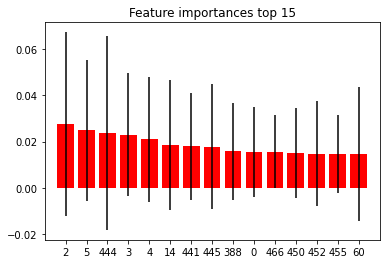

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=50,
                       n_jobs=-1, random_state=0)

In [225]:
rf_importance_logloss(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0,criterion='log_loss')

Feature ranking:
1. feature no:3 feature name:('weight_kg',) (0.111663)
2. feature no:4 feature name:('bmi',) (0.077034)
3. feature no:563 feature name:('RadSourceNA',) (0.070317)
4. feature no:2 feature name:('height_cm',) (0.063206)
5. feature no:133 feature name:('HyperTensionTreatmentUnknown',) (0.046158)
6. feature no:447 feature name:('CA 19-9',) (0.043569)
7. feature no:388 feature name:('no_of_child',) (0.039895)
8. feature no:390 feature name:('RelationSubTypeAunt',) (0.028698)
9. feature no:471 feature name:('eGFR',) (0.027651)
10. feature no:441 feature name:('ALT',) (0.023766)
11. feature no:14 feature name:('pain_duration',) (0.022606)
12. feature no:559 feature name:('RadiologyDoneUnknown',) (0.021597)
13. feature no:379 feature name:('alcohol_unit',) (0.019661)
14. feature no:54 feature name:('WeightLossNo',) (0.019157)
15. feature no:5 feature name:('Number_days_to_visit',) (0.017933)
16. feature no:446 feature name:('Bil',) (0.016640)
17. feature no:466 feature name:('

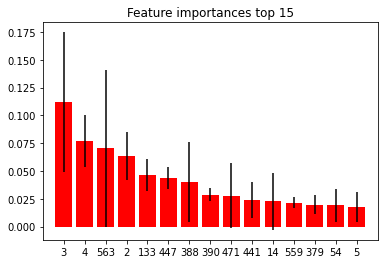

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=0)

In [201]:
gbt_importance(X_train,y_train,max_depth=10,top_n=15,n_estimators=50,random_state=0)

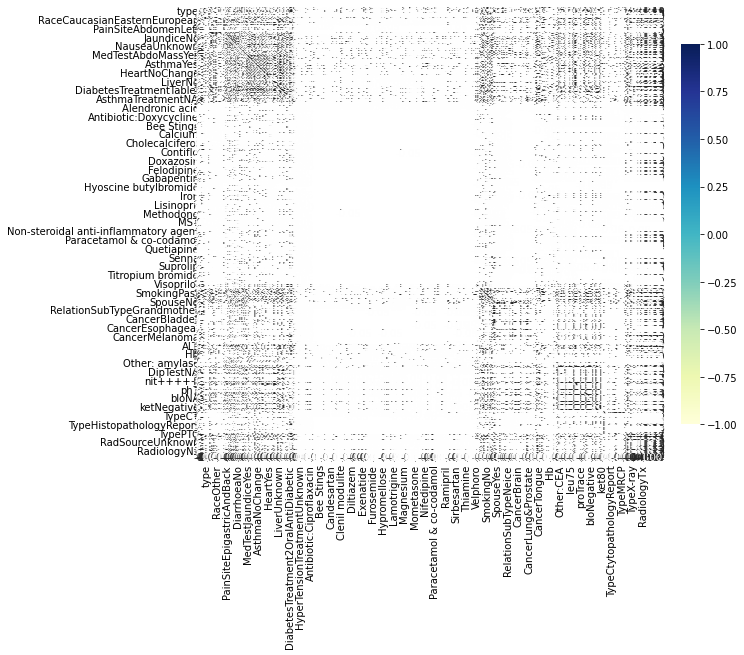

In [227]:
correlation_heatmap(df)

In [265]:
# Compare Algorithms
#Zero Inputation 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Multinomial', LogisticRegression(multi_class='multinomial', solver='lbfgs'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('AdaBoost', AdaBoostClassifier())) 
models.append(('SVM_rbf', SVC(kernel='rbf'))) 
models.append(('SVM_sigmoid', SVC(kernel='sigmoid'))) 
models.append(('GNB', GaussianNB()))
models.append(('SDG', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))


# evaluate each model in turn

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))

Multinomial
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       397
           1       0.76      0.72      0.74       185
           2       0.81      0.82      0.81       288

    accuracy                           0.84       870
   macro avg       0.82      0.81      0.82       870
weighted avg       0.83      0.84      0.83       870

KNN
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       397
           1       0.75      0.62      0.68       185
           2       0.81      0.76      0.78       288

    accuracy                           0.80       870
   macro avg       0.79      0.76      0.77       870
weighted avg       0.80      0.80      0.79       870

AdaBoost
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       397
           1       0.80      0.62      0.70       185
           2       0.68      0.68      0.68       

# constant_feature_detect(df,threshold=0.98)

In [268]:
corr_feature_detect(df,threshold=0.8)

[  feature1 feature2  corr
 0       Ur      ALP   1.0,
                feature1 feature2      corr
 2  Number_days_to_visit      age  0.999295,
     feature1     feature2      corr
 4      proNA   DipTestYes  0.999060
 6      proNA        ketNA  0.999060
 8      proNA        gluNA  0.999060
 11     proNA        leuNA  0.999060
 13     proNA        bloNA  0.999060
 36     proNA  ketNegative  0.997177
 38     proNA    DipTestNo  0.996251
 69     proNA         phNA  0.989641
 89     proNA         sgNA  0.976447
 138    proNA  nitNegative  0.949074
 212    proNA  gluNegative  0.912122,
          feature1         feature2      corr
 14   RadiologyNNA     RadiologyTNA  0.998481
 15   RadiologyNNA  RadiologyDoneNo  0.998481
 309  RadiologyNNA      RadSourceNA  0.826846,
          feature1         feature2      corr
 16   RadiologyMNA     RadiologyTNA  0.998481
 21   RadiologyMNA  RadiologyDoneNo  0.998481
 311  RadiologyMNA      RadSourceNA  0.826846,
             feature1           feature2 

In [295]:
mutual_info(X_train,y_train,select_k=15)

MultiIndex([(                 'age',),
            (           'height_cm',),
            (           'weight_kg',),
            (                 'bmi',),
            ('Number_days_to_visit',),
            (                 'ALT',),
            (                'Alp1',),
            (                 'Bil',),
            (             'CA 19-9',),
            (               'Creat',),
            (                  'Hb',),
            (                 'Plt',),
            (                'Urea',),
            (                 'WCC',),
            (                'eGFR',)],
           )

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split    

logreg = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
logreg = logreg.fit(X_train, y_train)
output2 = logreg.predict(X_test)

logreg.intercept_
logreg.coef_
logreg.classes_

array([0, 1, 2])

In [292]:
logreg.coef_

array([[-3.34732192e-01,  4.02303222e-01, -1.77880949e-01, ...,
        -5.04048090e-02, -1.22501774e-01,  5.45133267e-01],
       [-2.37426340e-01, -4.02299011e-01,  5.48682073e-01, ...,
        -4.59228798e-02,  1.61864366e-01, -1.76982372e-01],
       [ 5.72158532e-01, -4.21072383e-06, -3.70801123e-01, ...,
         9.63276888e-02, -3.93625923e-02, -3.68150895e-01]])

In [293]:
logreg.intercept_

array([ 1.08415375, -1.65308991,  0.56893616])

In [294]:
logreg.classes_

array([0, 1, 2])